In [1]:
# pylab Populating the interactive namespace from numpy and matplotlib
# numpy for numerical computation
# matplotlib for ploting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Exercise1.1
Plot $f(x) = 1 - e ^ (2 * x)$ over $[-1, 1]$ with intervals $.01$

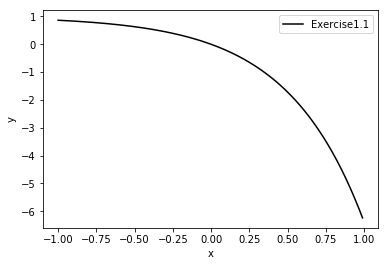

In [4]:
"""
Exercise1.1
Plot f(x) = 1 - e ^ (2 * x) over [-1, 1] with intervals .01
"""

x_range = arange(-1, 1, .01)
y_range = array([1 - exp(2 * x) for x in x_range])
plot(x_range, y_range, 'k-', label = "Exercise1.1")
ylabel("y")
xlabel("x")
legend(loc='upper right')

## Exercise1.2
Solve matrix multiplication of

$$
\left[\begin{array}{ccc} 
0 &-1& 2\\
-2& -1& 4\\
2& 7& -2
\end{array}\right]
\left[\begin{array}{ccc} 
-7& 1& 1\\ 
7& -3& -2\\
3& 5& 0
\end{array}\right]
$$ 

$$y = [3, -1, 2] $$



Solve $C = A*B$, 

$$Cx = y$$.



In [9]:
"""
Exercise1.2
Solve matrix multiplication 
"""
#from numpy import array, linalg

A = array([[0, -1, 2], [-2, -1, 4], [2, 7, -2]])
B = array([[-7, 1, 1], [7, -3, -2], [3, 5, 0]])
y = array([3, -1, 2])


def part_a():
    """
    Solve Cx = y using standard matrix multiplication for A and B
    """
    C = A.dot(B)
    x = linalg.solve(C, y)
    return x


print "The standard matrix product C"
print A.dot(B)

print "Matrix multiplication"

print part_a()




standard matrix product C
[[ -1  13   2]
 [ 19  21   0]
 [ 29 -29 -12]]
Matrix multiplication
[-1.046875    0.89955357 -4.87053571]

element-by-element matrix product C
[[  0  -1   2]
 [-14   3  -8]
 [  6  35   0]]

Element-wise multiplication
[-0.79958678  0.19421488  1.59710744]


In [ ]:
def part_b():
    """
    Solve Cx = y using element-wise multiplication (Hadamard product)
    """
    C = A * B
    x = linalg.solve(C, y)
    return x

print "\nThe element-by-element matrix product C"
print A * B

print "\nElement-wise multiplication"
print part_b()

## Exercise1.3

calculate the time series

$$yt = 5 + .05 * t + Et$$ 

(Where E is epsilon)

for years $1960, 1961, ..., 2001$ assuming $Et$ independently and identically distributed with mean $0$ and sigma $0.2$.

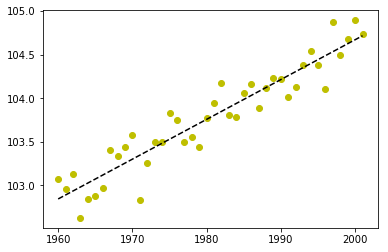

In [11]:
"""
Exercise1.3
calculate the time series
"""

#from numpy import random, array, polyfit, poly1d

mu = -0.2
sigma = 0.2


"""
Create the time series, yt, then perform a regress on yt, plot yt and the its trendline
"""
start_year = 1960
end_year = 2001

t_array = array(range(start_year, end_year + 1))
epsilon_t = array(random.normal(mu, sigma,len(t_array)))
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html




yt = array([5 + .05 * t_i + epsilon_t[i] for i, t_i in enumerate(t_array)])
fit = polyfit(t_array, yt, 1)
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
"""
Least squares polynomial fit.

Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 

Returns a vector of coefficients p that minimises the squared error.
"""

fit_func = poly1d(fit)

"""
https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html
A one-dimensional polynomial class.

A convenience class, 
used to encapsulate “natural” operations on polynomials 
so that said operations may take on their customary form in code .

"""


# two plots together
plot(t_array, yt, "yo", t_array, fit_func(t_array), "--k")


## Exercise1.4


Consider the original example with the farmer where acreage planted will be

$$a = 0.5 + 0.5 * Ep$$ (Ep is expected price)

Quantity q is equivalent to

$$q = a * y$$ (y is yield)

Clearing price p is

$$p = 3 - 2 * q$$

Assume in our case that yield will be a random two point distribution s.t.

```
y = array([0.7, 1.3])
```



Our goal is to compute the variance of this price distribution, otherwise known
as $sigma^2$ for part a.

In [12]:


#from math import exp, fabs

#from numpy import array, var




#part_a():
"""
Compute the variance in price
"""
a = 1
y, w = array([0.7, 1.3]), array([0.5, 0.5])




for _ in range(100):
    a_previous = a
    p = 3 - 2 * a * y
    f = w.dot(p)
    a = 0.5 + 0.5 * f
    if fabs(a_previous - a) < exp(-8):
        break
print "acreage", a, "variance:", var(p), "expectation", p.dot(w)








acreage 1.0 variance: 0.36 expectation 1.0
